/var/folders/gr/g6k4s8t13n98c8bw4ywdpxrr0000gn/T/ipykernel_10839/1182727632.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("RdBu", 5)


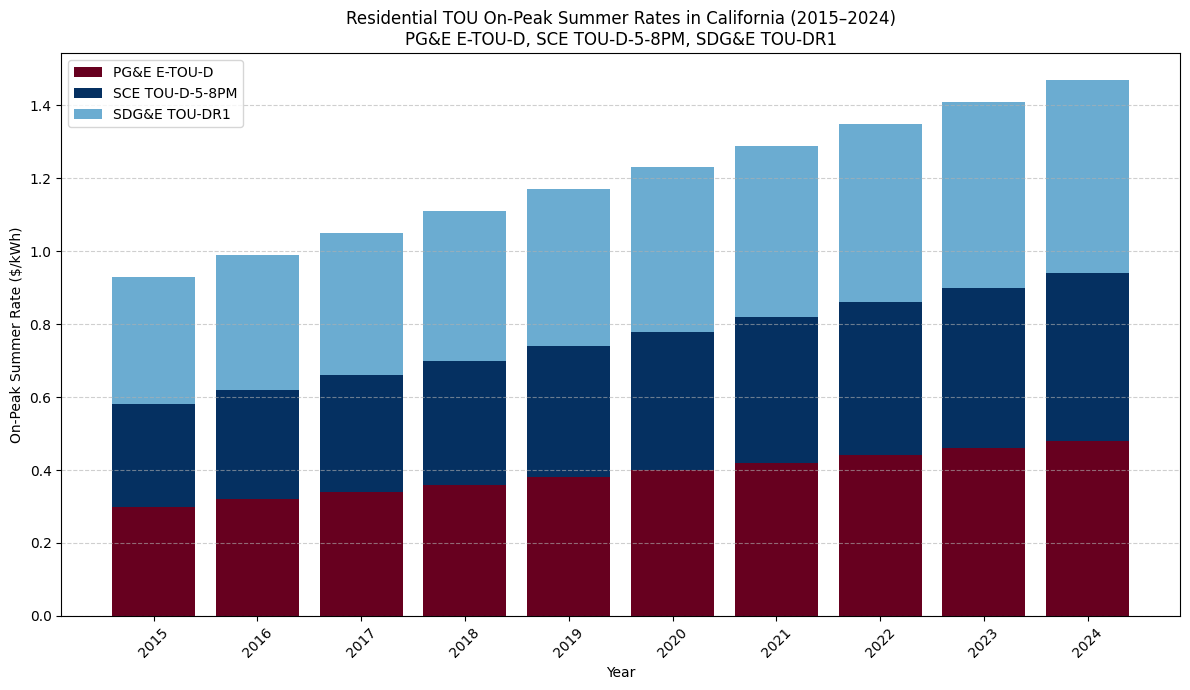

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

tou_rates_data = {
    "Year": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "PG&E E-TOU-D": [0.30, 0.32, 0.34, 0.36, 0.38, 0.40, 0.42, 0.44, 0.46, 0.48],
    "SCE TOU-D-5-8PM": [0.28, 0.30, 0.32, 0.34, 0.36, 0.38, 0.40, 0.42, 0.44, 0.46],
    "SDG&E TOU-DR1": [0.35, 0.37, 0.39, 0.41, 0.43, 0.45, 0.47, 0.49, 0.51, 0.53]
}

# Extract data
years = tou_rates_data["Year"]
pge_tou = tou_rates_data["PG&E E-TOU-D"]
sce_tou = tou_rates_data["SCE TOU-D-5-8PM"]
sdge_tou = tou_rates_data["SDG&E TOU-DR1"]

# Get colors from RdBu colormap
cmap = cm.get_cmap("RdBu", 5)
colors = [cmap(0), cmap(4), cmap(3)]  # PG&E, SCE, SDG&E

plt.figure(figsize=(12, 7))
bar1 = plt.bar(years, pge_tou, label='PG&E E-TOU-D', color=colors[0])
bar2 = plt.bar(years, sce_tou, bottom=pge_tou, label='SCE TOU-D-5-8PM', color=colors[1])
stack_bottom = [p + s for p, s in zip(pge_tou, sce_tou)]
bar3 = plt.bar(years, sdge_tou, bottom=stack_bottom, label='SDG&E TOU-DR1', color=colors[2])

plt.xlabel("Year")
plt.ylabel("On-Peak Summer Rate ($/kWh)")
plt.title("Residential TOU On-Peak Summer Rates in California (2015–2024)\nPG&E E-TOU-D, SCE TOU-D-5-8PM, SDG&E TOU-DR1")
plt.legend()
plt.xticks(years, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

/var/folders/gr/g6k4s8t13n98c8bw4ywdpxrr0000gn/T/ipykernel_10839/3678143021.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("RdBu", 5)


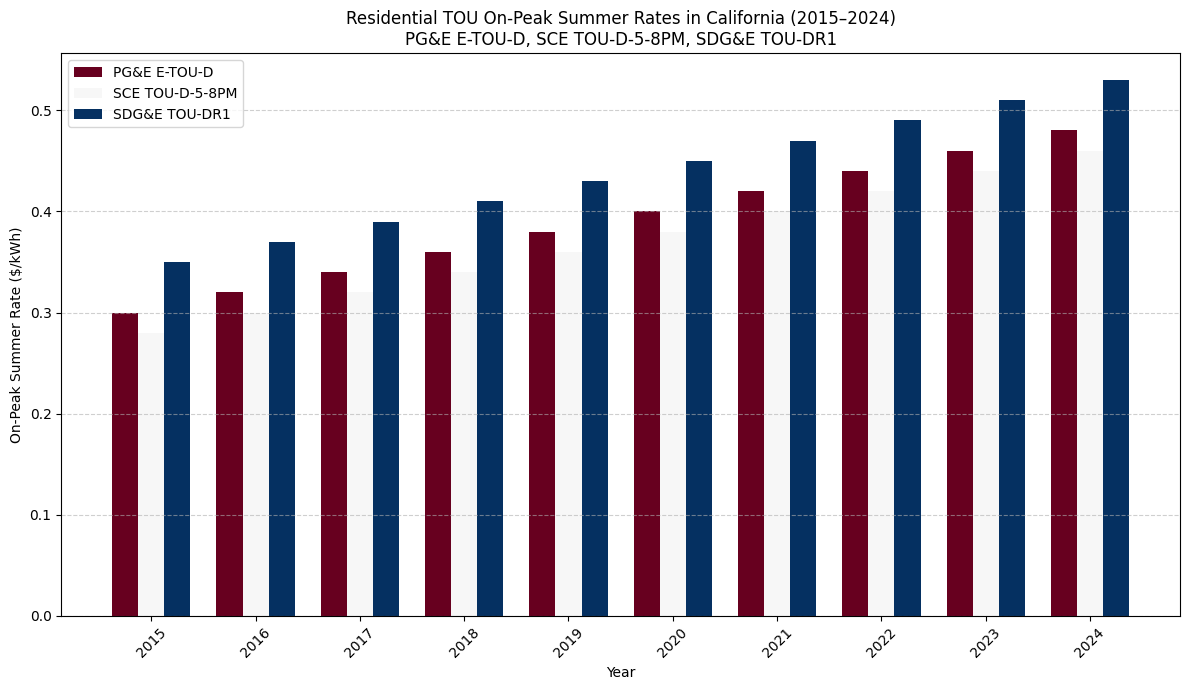

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Define the TOU on-peak summer rates (approximate values)
tou_rates_data = {
    "Year": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "PG&E E-TOU-D": [0.30, 0.32, 0.34, 0.36, 0.38, 0.40, 0.42, 0.44, 0.46, 0.48],
    "SCE TOU-D-5-8PM": [0.28, 0.30, 0.32, 0.34, 0.36, 0.38, 0.40, 0.42, 0.44, 0.46],
    "SDG&E TOU-DR1": [0.35, 0.37, 0.39, 0.41, 0.43, 0.45, 0.47, 0.49, 0.51, 0.53]
}

# Extract data for plotting
years = np.array(tou_rates_data["Year"])
pge_tou = np.array(tou_rates_data["PG&E E-TOU-D"])
sce_tou = np.array(tou_rates_data["SCE TOU-D-5-8PM"])
sdge_tou = np.array(tou_rates_data["SDG&E TOU-DR1"])

# Define bar width and position offsets
bar_width = 0.25
x = np.arange(len(years))

# Get colors from PiYG colormap
cmap = cm.get_cmap("RdBu", 5)
colors = [cmap(0.1), cmap(0.5), cmap(0.9)]

# Create grouped bar chart
plt.figure(figsize=(12, 7))
plt.bar(x - bar_width, pge_tou, width=bar_width, label='PG&E E-TOU-D', color=colors[0])
plt.bar(x, sce_tou, width=bar_width, label='SCE TOU-D-5-8PM', color=colors[1])
plt.bar(x + bar_width, sdge_tou, width=bar_width, label='SDG&E TOU-DR1', color=colors[2])

# Customize chart
plt.xlabel("Year")
plt.ylabel("On-Peak Summer Rate ($/kWh)")
plt.title("Residential TOU On-Peak Summer Rates in California (2015–2024)\nPG&E E-TOU-D, SCE TOU-D-5-8PM, SDG&E TOU-DR1")
plt.xticks(x, years, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()

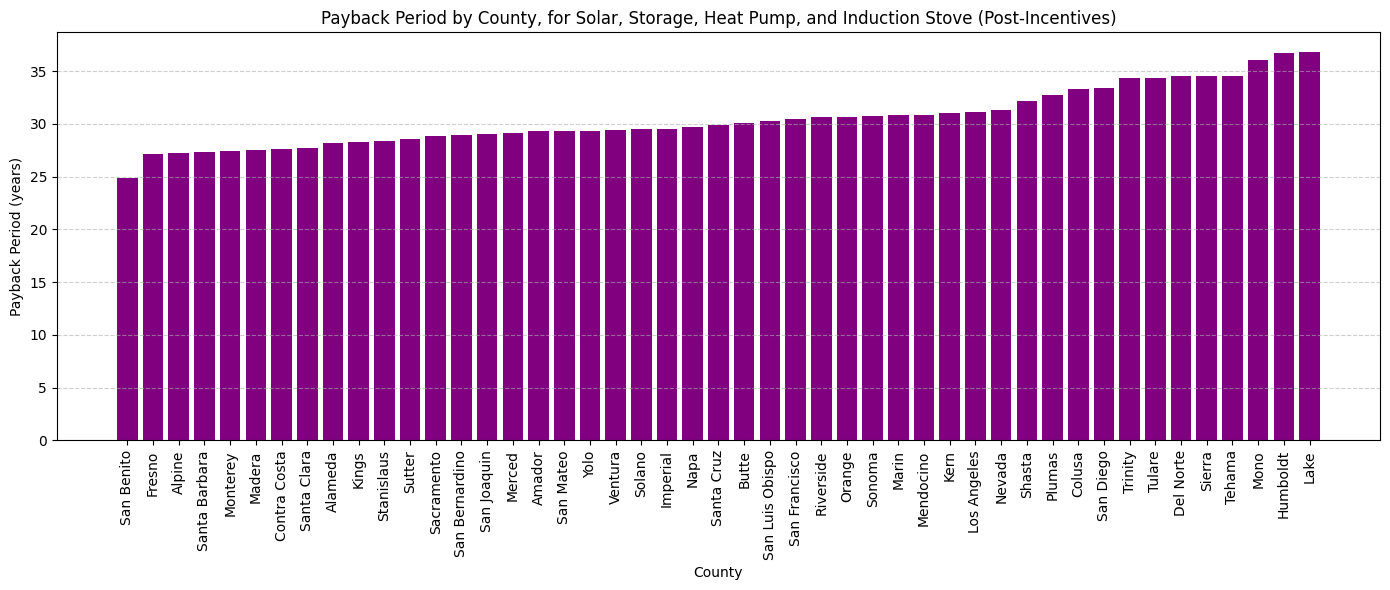

In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoDataFrame
gdf_path = "../data/loadprofiles/heat_pump_and_induction_stove/single-family-detached/CAPITAL_COSTS/visualizations/metrics_geojson/heat_pump_and_induction_stove.geojson"
gdf = gpd.read_file(gdf_path)

# Filter out rows without payback data and sort by payback period
gdf_sorted = gdf[gdf["Payback Period"].notnull()].sort_values(by="Payback Period")

# Plot bar chart
plt.figure(figsize=(14, 6))
plt.bar(gdf_sorted["NAME"], gdf_sorted["Payback Period"], color='purple')
plt.xlabel("County")
plt.ylabel("Payback Period (years)")
plt.title("Payback Period by County, for Solar, Storage, Heat Pump, and Induction Stove (Post-Incentives)")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

          NAME  county_slug  Total Cost After Incentives  Payback Period  \
0        Modoc        modoc                          NaN             NaN   
1         Napa         napa                   27801.4510       19.754009   
2   Stanislaus   stanislaus                   25929.4060       18.933245   
3  San Joaquin  san-joaquin                   26491.0195       19.179132   
4       Colusa       colusa                   22613.2120       20.276008   

   Annual Savings  Solar Capacity  Storage Capacity  \
0             NaN             NaN               NaN   
1     1407.382729            9.46              13.5   
2     1369.517236            8.76              13.5   
3     1381.241804            8.97              13.5   
4     1115.269428            7.52              13.5   

                                            geometry  
0  POLYGON ((-121.45721 41.94994, -121.44754 41.9...  
1  POLYGON ((-122.62740 38.66751, -122.46389 38.7...  
2  POLYGON ((-121.47192 37.48178, -121.24122 37

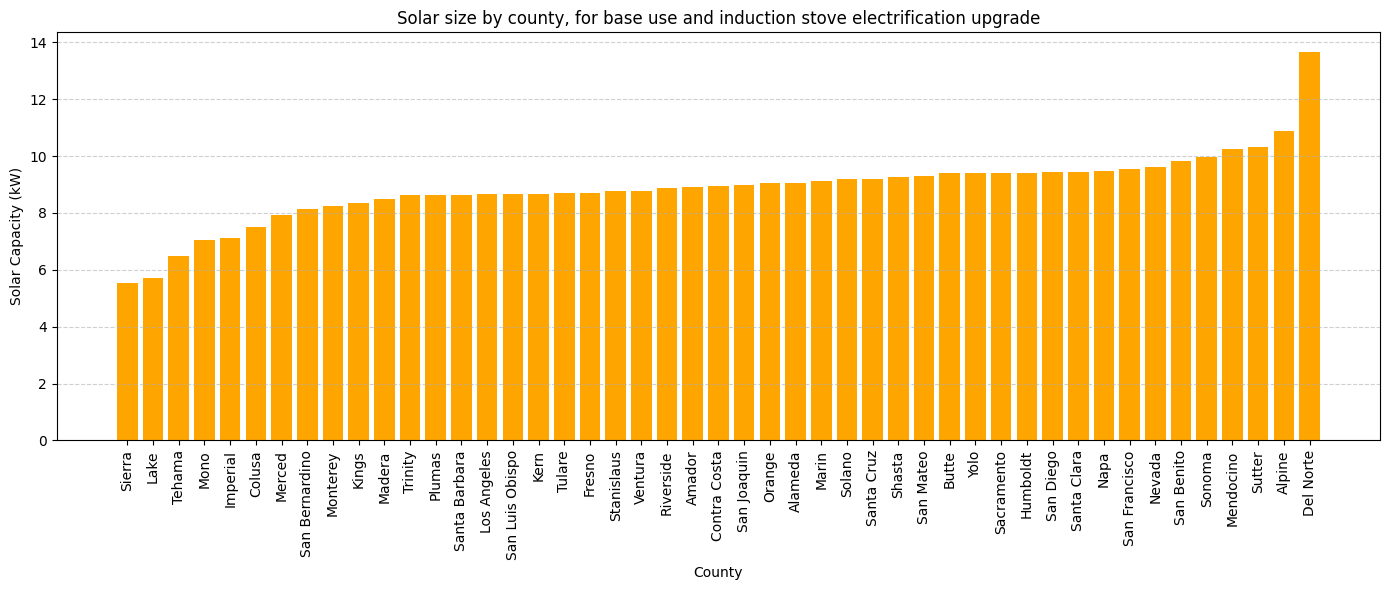

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoDataFrame
# scenario = "heat_pump_and_induction_stove"
# scenario = "heat_pump"

scenario = "induction_stove"

gdf_path = f"../data/loadprofiles/{scenario}/single-family-detached/CAPITAL_COSTS/visualizations/metrics_geojson/{scenario}.geojson"
gdf = gpd.read_file(gdf_path)

# Filter out rows without payback data and sort by payback period

print(gdf.head())
gdf_sorted = gdf[gdf["Solar Capacity"].notnull()].sort_values(by="Solar Capacity")

# Plot bar chart
plt.figure(figsize=(14, 6))
plt.bar(gdf_sorted["NAME"], gdf_sorted["Solar Capacity"], color='orange')
plt.xlabel("County")
plt.ylabel("Solar Capacity (kW)")
plt.title("Solar size by county, for base use and induction stove electrification upgrade")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [13]:
import geopandas as gpd
import folium
import os

# Load built-in counties shapefile from geopandas (or your own .shp/.geojson)
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for United States, then California (if you're using national data)
us_states = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2022/shp/cb_2022_us_county_20m.zip")
california_counties = us_states[us_states['STATEFP'] == '06']  # '06' is California FIPS code

# Center the map on California
m = folium.Map(location=[37.5, -119.5], zoom_start=6, tiles='cartodbpositron')

# Add the counties to the map
folium.GeoJson(
    california_counties,
    name="California Counties",
    tooltip=folium.GeoJsonTooltip(fields=["NAME"], aliases=["County:"])
).add_to(m)

folium.LayerControl().add_to(m)

# Save or display
m.save("california_counties_map.html")
m

/var/folders/gr/g6k4s8t13n98c8bw4ywdpxrr0000gn/T/ipykernel_2432/1960480544.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


HTTPError: HTTP Error 403: Forbidden

In [ ]:
def initialize_map():
    url = "https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_20m.zip"
    zip_name = "cb_2018_us_county_20m.zip"
    folder = "cb_2018_us_county_20m"

    if not os.path.exists(folder):
        r = requests.get(url, stream=True)

        with open(zip_name, "wb") as f:
            for chunk in r.iter_content(chunk_size=1024):
                f.write(chunk)
        with ZipFile(zip_name, "r") as zip_ref:
            zip_ref.extractall(folder)
    shp_file = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith(".shp")][0]

    gdf = gpd.read_file(shp_file)

    # Filter for California (STATEFP code "06")
    gdf = gdf[gdf["STATEFP"] == "06"][["NAME", "geometry"]].copy()

    return gdf

def outline_style_function(feature):
    return {
        "fillColor":   "transparent",  # no fill, Choropleth covers it
        "color":       "black",        # or utility‐based if you like
        "weight":      1,
        "fillOpacity": 0
    }


In [ ]:
import folium
from folium import GeoJsonTooltip
import os
import requests
import geopandas as gpd
from zipfile import ZipFile

def map_all_california_counties():
    # Load the California counties GeoDataFrame
    gdf = initialize_map()

    # Initialize map centered on California
    m = folium.Map(location=[37.5, -119.5], zoom_start=6, tiles="cartodbpositron")

    # Tooltip for county names
    tooltip = GeoJsonTooltip(fields=["NAME"], aliases=["County:"], localize=True)

    # Add county boundaries and tooltips
    folium.GeoJson(
        gdf,
        style_function=outline_style_function,
        tooltip=tooltip,
        name="California Counties"
    ).add_to(m)

    # Add county name labels at centroids
    for _, row in gdf.iterrows():
        centroid = row.geometry.centroid
        county_name = row["NAME"]
        folium.map.Marker(
            [centroid.y, centroid.x],
            icon=folium.DivIcon(html=f"<div style='font-size:6pt'>{county_name}</div>")
        ).add_to(m)

    folium.LayerControl().add_to(m)

    # Add a title (optional)
    m.get_root().html.add_child(folium.Element("<h3 align='center'>California Counties</h3>"))

    # Save or display
    m.save("california_counties_map.html")
    return m

# Call the function to generate the map
map_all_california_counties()